In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [2]:
data_frame_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_frame_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_frame_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
melted_result_confirmed = pd.melt(data_frame_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
melted_result_deaths = pd.melt(data_frame_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
melted_result_recovered = pd.melt(data_frame_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')

melted_result_confirmed['Date'] = pd.to_datetime(melted_result_confirmed['Date']).dt.date
melted_result_deaths['Date'] = pd.to_datetime(melted_result_deaths['Date']).dt.date
melted_result_recovered['Date'] = pd.to_datetime(melted_result_recovered['Date']).dt.date

melted_result_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0
...,...,...,...,...,...,...
16946,NaN,Burma,21.9162,95.9560,2020-03-28,8
16947,Anguilla,United Kingdom,18.2206,-63.0686,2020-03-28,2
16948,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-03-28,2
16949,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-03-28,4


In [4]:
pivot_table_confirmed = pd.pivot_table(melted_result_confirmed, index=['Country/Region', 'Date'], values=['Confirmed'], aggfunc = 'sum')
pivot_table_deaths = pd.pivot_table(melted_result_deaths, index=['Country/Region', 'Date'], values=['Deaths'], aggfunc = 'sum')
pivot_table_recovered = pd.pivot_table(melted_result_recovered, index=['Country/Region', 'Date'], values=['Recovered'], aggfunc = 'sum')

pivot_table_confirmed

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2020-03-24          3
               2020-03-25          3
               2020-03-26          3
               2020-03-27          5
               2020-03-28          7

[11859 rows x 1 columns]

In [5]:
def make_the_plot(country):
    confirmed = pivot_table_confirmed.loc[country, 'Confirmed']
    deaths = pivot_table_deaths.loc[country, 'Deaths']
    recovered = pivot_table_recovered.loc[country, 'Recovered']
    pp.plot(confirmed.index, confirmed.values, label='Confirmed', color='red', marker='o')
    pp.plot(deaths.index, deaths.values, label='Deaths', color='black', marker='o')
    pp.plot(recovered.index, recovered.values, label='Recovered', color='green', marker='o')
    pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)
    pp.title("CODVID-19 in " + country)

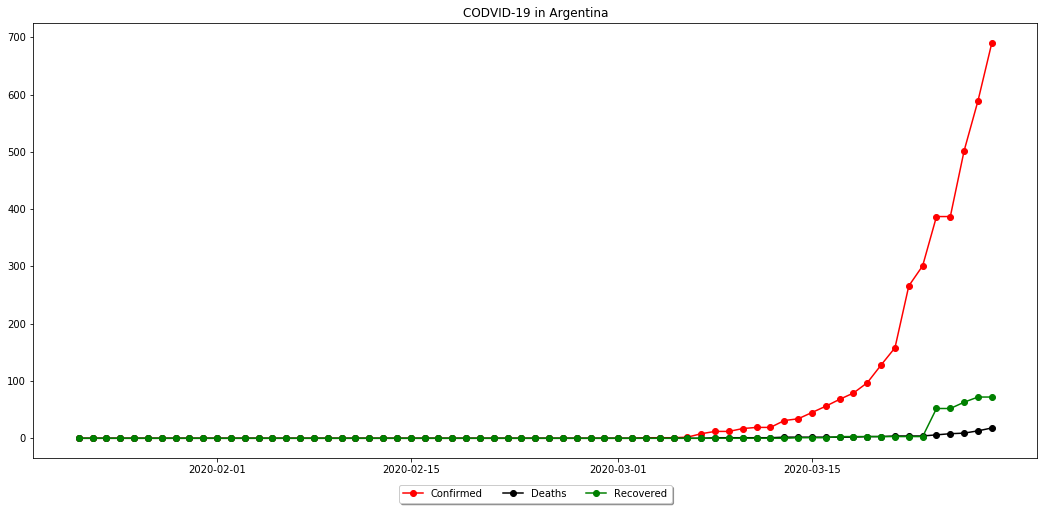

In [6]:
pp.figure(figsize = (18, 8))
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Change the name of the country
make_the_plot('Argentina')

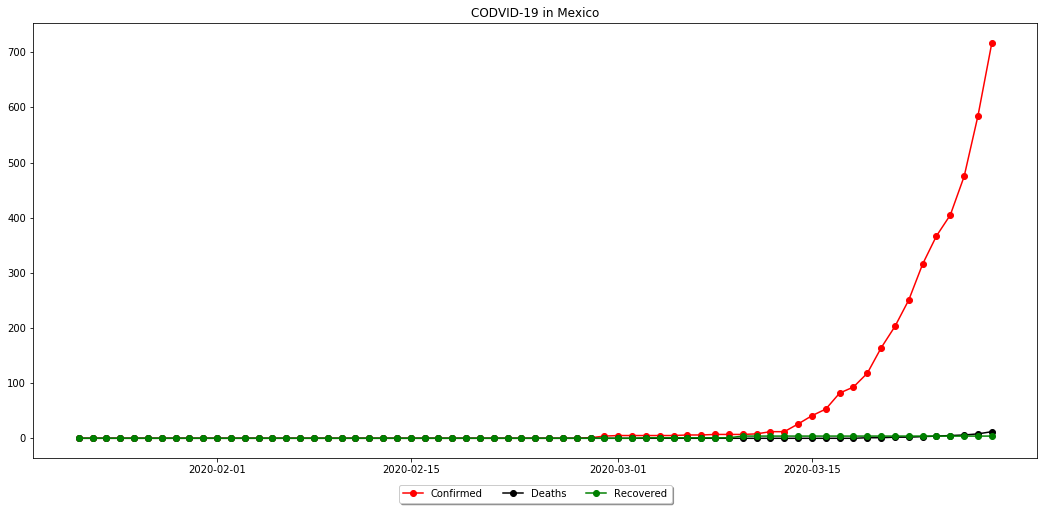

In [7]:
pp.figure(figsize = (18, 8))
make_the_plot('Mexico')

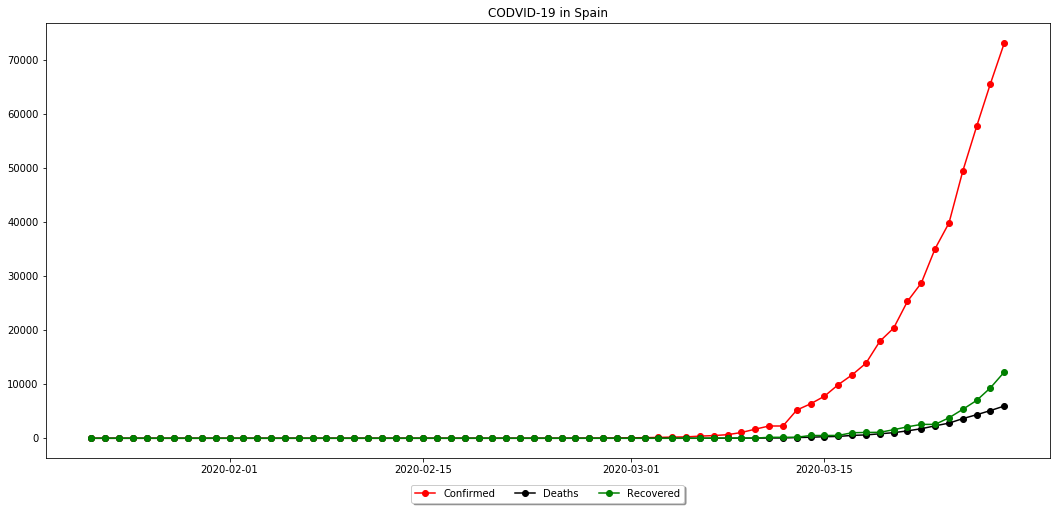

In [8]:
pp.figure(figsize = (18, 8))
make_the_plot('Spain')